# IDSimPy Documentation: Plot / Animation generation

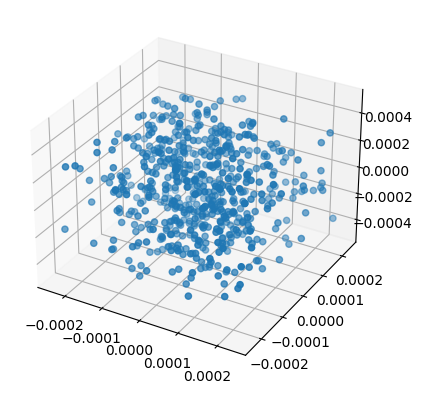

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import IDSimPy.analysis.trajectory as tr


# open a hdf5 trajectory file:
hdf5_file = os.path.join('..','..','test','analysis','data','trajectory_v3','qitSim_2019_04_scanningTrapTest',
                                      'qitSim_2019_04_10_001_trajectories.hd5')


tra = tr.read_hdf5_trajectory_file(hdf5_file)


# extract positions of first recorded time step: 
ts = tra.get_positions(0)

# create a 3d scatter plot of the particle positions in the first time step: 
x,y,z = ts[:,0],ts[:,1],ts[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

plt.savefig('user_guide_visualization_custom_scatter.svg')

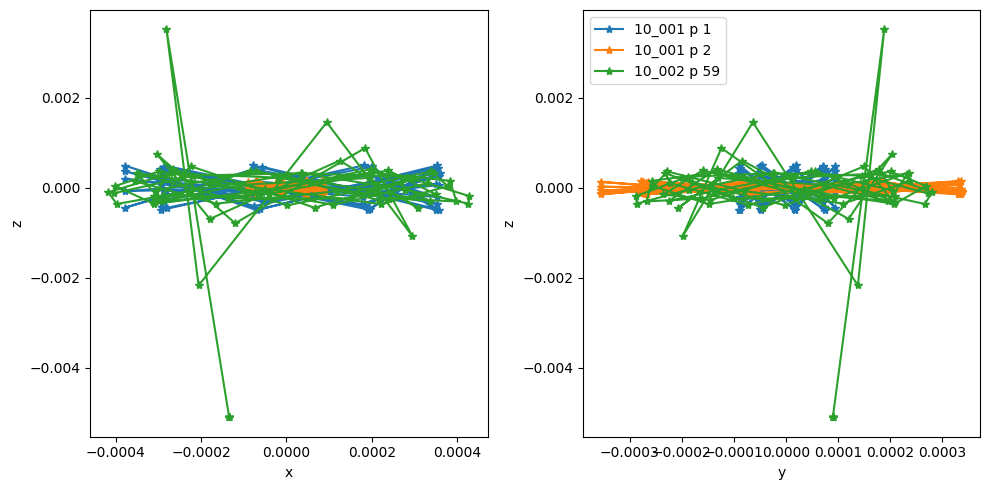

In [20]:
import os
import IDSimPy.analysis.trajectory as tr
import IDSimPy.analysis.visualization as vis

dat_path = os.path.join('..','..','test','analysis','data','trajectory_v3','qitSim_2019_04_scanningTrapTest')
tra_1 = tr.read_hdf5_trajectory_file(os.path.join(dat_path,'qitSim_2019_04_10_001_trajectories.hd5'))
tra_2 = tr.read_hdf5_trajectory_file(os.path.join(dat_path,'qitSim_2019_04_10_002_trajectories.hd5'))
result_name = 'test_particle_plotting_01'

dat = [
    (tra_1, (1, 2), "10_001"),
    (tra_2, 59, "10_002"),
]

vis.plot_particle_traces(result_name, dat)


In [21]:
# the visualization lib can generate density plots: 
ts_index = 50
vis.plot_density_xz(traj_hdf5, ts_index,
                    xedges=np.linspace(-0.001, 0.001, 50),
                    zedges=np.linspace(-0.001, 0.001, 50),
                    figsize=(5,5),
                    axis_equal=True);

NameError: name 'traj_hdf5' is not defined

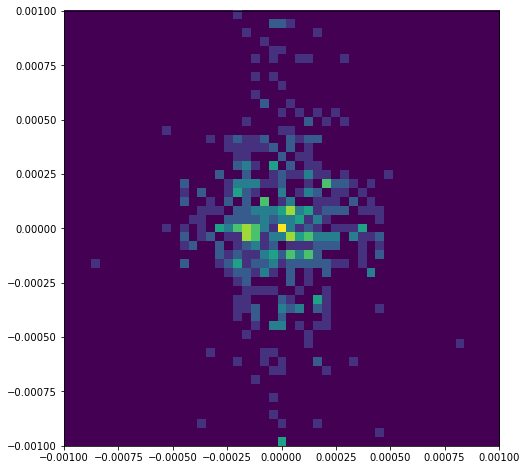

In [18]:
# the visualization lib can generate density plots: 
ts_index = 50
vis.plot_density_xz(tra_1, ts_index,
                    xedges=np.linspace(-0.001, 0.001, 50),
                    zedges=np.linspace(-0.001, 0.001, 50),
                    figsize=(8,8),
                    axis_equal=True);
plt.savefig('density_plot2.svg')

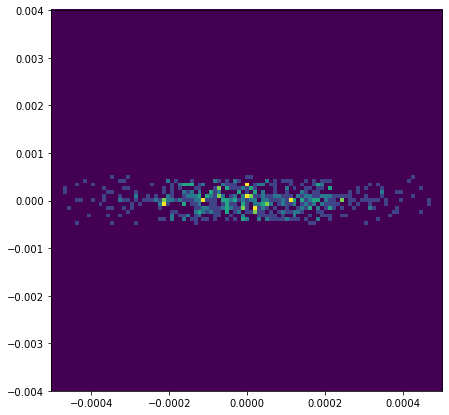

In [22]:
data_base_path = os.path.join('..', 'test', 'analysis', 'data')
project_name = os.path.join(data_base_path, 'qitSim_2019_04_scanningTrapTest', 'qitSim_2019_04_15_001')

result_name = 'density_animation'

vis.render_xz_density_animation(
    project_name, result_name, 
    xedges=100,
    zedges=np.linspace(-0.004, 0.004, 100),
    axis_equal=False, file_type='legacy_hdf5')

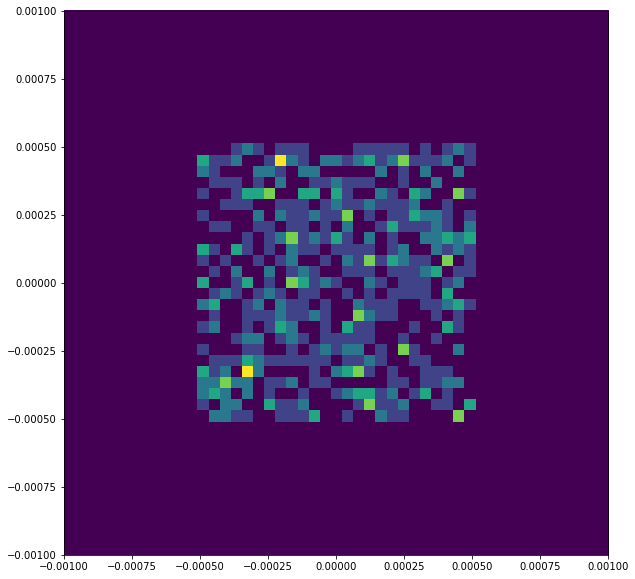

In [31]:
# open trajectory: 
data_base_path = os.path.join('..', 'test', 'analysis', 'data')
trj_name = os.path.join(data_base_path, 'qitSim_2019_04_scanningTrapTest', 'qitSim_2019_04_15_001_trajectories.hd5')
tra = tr.read_legacy_hdf5_trajectory_file(trj_name)

# generate animation object:
anim = vis.animate_xz_density(
    tra,
    xedges=np.linspace(-0.001, 0.001, 50),
    zedges=np.linspace(-0.001, 0.001, 50),
    figsize=(10, 10),
    n_frames=50)

# save animation to a video file: 
result_name = os.path.join('density_animation_test_1.mp4')
anim.save(result_name, fps=20, extra_args=['-vcodec', 'libx264'])

<Figure size 720x720 with 0 Axes>

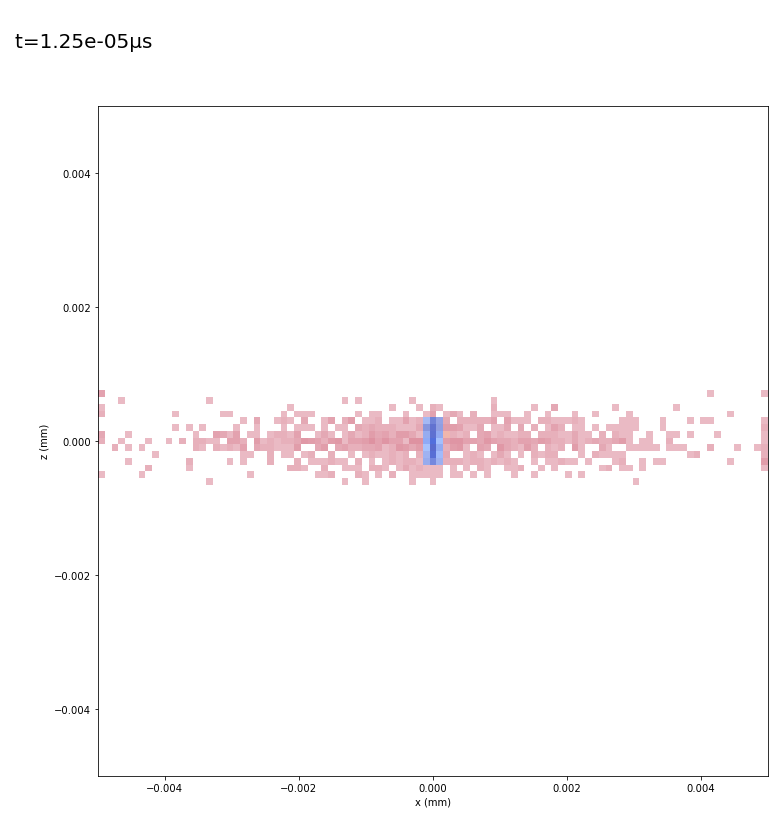

In [7]:
import os
import IDSimPy.analysis.visualization as vis


dat_path = os.path.join('..','test','analysis','data','qitSim_2019_07_variableTrajectoryQIT')
pro_1_name = os.path.join(dat_path,'qitSim_2019_07_22_001')
pro_2_name = os.path.join(dat_path,'qitSim_2019_07_22_002')
project_names = [pro_1_name, pro_2_name]
result_name = 'density_animation'


vis.render_xz_density_comparison_animation(
    project_names, ['all', 'all'], result_name, n_frames=50, interval=1, s_lim=5e-3, n_bins=[100, 100],
    select_mode=None, annotation="", mode="log", file_type='hdf5')

In [1]:
import os
import IDSimPy.analysis.visualization as vis


json_path = os.path.join('..','..','test','analysis','data','test')

trj_name = 'IMS_HS_reactive_test_001'
project_names = [trj_name, trj_name]
result_name = 'density_animation_massfiltered'

vis.render_xz_density_comparison_animation(
    project_names, [0, 1], result_name, n_frames=100, interval=1, s_lim=[-1, 5, -1, 1], n_bins=[100, 20],
    select_mode='substance', annotation="", mode="log", file_type='hdf5')

ModuleNotFoundError: No module named 'IDSimPy'

In [3]:
trj = tr.read_hdf5_trajectory_file('IMS_HS_reactive_test_001_trajectories.hd5')
display(trj.particle_attribute_names)

NameError: name 'tr' is not defined

In [1]:
import os
import IDSimPy.analysis.visualization as vis

# alpha value:
hdf5_variable_projectname = os.path.join('..','..','test','analysis','data', 
                'trajectory_v3','qitSim_2019_07_variableTrajectoryQIT', 'qitSim_2019_07_22_001')

# which can be rendered as scatter animation in a high level function:
# (with fixed x,y,z limits)
result_name = os.path.join('scatter_animation_alpha')
vis.render_scatter_animation(
    hdf5_variable_projectname, result_name, 
    alpha=0.9,
    interval=1)

In [2]:
import os
import IDSimPy.analysis.visualization as vis

# spatial limits:
hdf5_variable_projectname = os.path.join('..','..','test','analysis','data', 
                'trajectory_v3','qitSim_2019_07_variableTrajectoryQIT', 'qitSim_2019_07_22_001')

# which can be rendered as scatter animation in a high level function:
# (with fixed x,y,z limits)
result_name = os.path.join('scatter_animation_custom_limits')
vis.render_scatter_animation(
    hdf5_variable_projectname, result_name, 
    xlim=(-0.005,0.005), ylim=(-0.005,0.005), zlim=(-0.006,0.006),
    interval=1)

In [3]:
# Projection switch:
hdf5_name = os.path.join('..','..','test','analysis','data', 
                'trajectory_v3','capacitor_all_splat', 'capacitor_all_splat_static')

result_name = os.path.join('scatter_animation_projection_xy_xz')
vis.render_scatter_animation(
    hdf5_name, result_name, 
    projection='xy_xz')

result_name = os.path.join('scatter_animation_projection_xy_yz')
vis.render_scatter_animation(
    hdf5_name, result_name, 
    projection='xy_yz')

In [5]:
import os
import IDSimPy.analysis.visualization as vis
import IDSimPy.analysis.trajectory as vis

# rendering of active particles:
hdf5_name = os.path.join('..','..','test','analysis','data', 
                'trajectory_v3','capacitor_all_splat', 'capacitor_all_splat_static')

# which can be rendered as scatter animation in a high level function:
# (with fixed x,y,z limits)
result_name = os.path.join('scatter_animation_active_only')
vis.render_scatter_animation(
    hdf5_name, result_name, 
    only_active_particles=True,
    xlim=(0.0,0.1), ylim=(-0.02,0.02), zlim=(-0.02,0.02),
    interval=1, alpha=0.9)

In [9]:
# coloring of active particles:
import os
import IDSimPy.analysis.visualization as vis
import IDSimPy.analysis.trajectory as tr

hdf5_name = os.path.join('..','..','test','analysis','data', 
                'trajectory_v3','capacitor_all_splat', 'capacitor_all_splat_static_trajectories.hd5')

tra = tr.read_hdf5_trajectory_file(hdf5_name)
is_active = tr.is_active_particle(tra, true_val=0.4, false_val=0.9)
anim = vis.animate_scatter_plot(tra, color_parameter=is_active, cmap='plasma', crange=(0, 1), projection='xy_yz', xlim=(0.0,0.11), alpha=0.6)
anim.save('scatter_animation_active_marked.mp4', fps=20, extra_args=['-vcodec', 'libx264'])

In [ ]:
# low level active particles: 

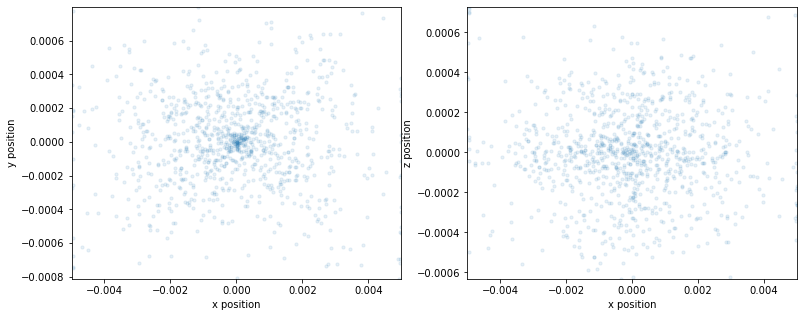

In [25]:
import os
import IDSimPy.analysis.visualization as vis


data_base_path = os.path.join('..','test','analysis','data')
project_name = os.path.join(
    data_base_path, 
    'qitSim_2019_07_variableTrajectoryQIT', 
    'qitSim_2019_07_22_001')

result_name = os.path.join('scatter_animation_simple')

vis.render_scatter_animation(project_name, result_name)

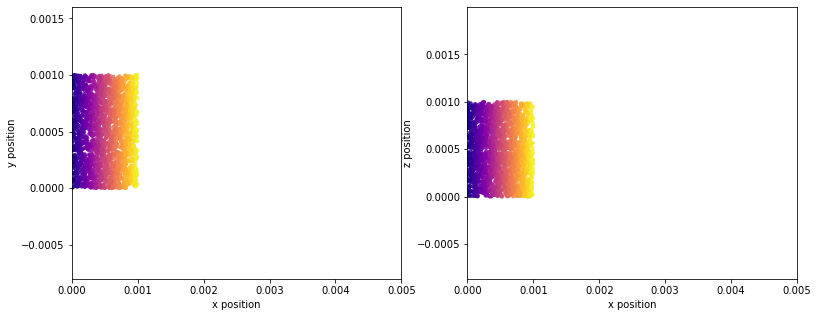

In [46]:
import os
import numpy as np
import IDSimPy.analysis.visualization as vis

data_base_path = os.path.join('..','test','analysis','data')
trajectory_file_name = os.path.join(
    data_base_path, 
    'reactive_IMS', 
    'IMS_HS_reactive_test_001_trajectories.hd5')

tra = tr.read_hdf5_trajectory_file(trajectory_file_name)

result_name = os.path.join('scatter_plot_colorized.mp4')

# use start x position for colorization: 
c_param = tra.get_positions(0)[:,0]

anim = vis.animate_scatter_plot(tra,
                                xlim=(0, 5e-3), ylim=(-8e-4, 16e-4), 
                                alpha=0.8, 
                                color_parameter=c_param, 
                                cmap='plasma')

anim.save(result_name, fps=20, extra_args=['-vcodec', 'libx264'])

In [5]:
import os
import IDSimPy.analysis.visualization as vis


# define project and file names
data_base_path = os.path.join('..','..','test','analysis','data')
project_name = os.path.join(
    data_base_path, 
    'reactive_IMS', 
    'IMS_HS_reactive_test_001')

result_name = os.path.join('chemical_id_colorized')

# render scatter animation with 'chemical_id' as colorization parameter and 'Set1' as colormap: 
vis.render_scatter_animation(project_name, result_name, 
                            xlim=(0, 5e-3), ylim=(-8e-4, 16e-4), 
                            alpha=0.8, 
                            color_parameter='chemical_id', 
                            cmap='Set1')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../../test/analysis/data/reactive_IMS/IMS_HS_reactive_test_001_trajectories.hd5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [10]:
import os
import IDSimPy.analysis.visualization as vis


# define project and file names
data_base_path = os.path.join('..','..','test','analysis','data')
project_name = os.path.join(
    data_base_path, 
    'trajectory_v3','reactive_IMS', 
    'IMS_HS_reactive_test_001')

result_name = os.path.join('chemical_id_colorized')

# render scatter animation with 'chemical_id' as colorization parameter and 'Set1' as colormap: 
vis.render_scatter_animation(project_name, result_name, 
                            xlim=(0, 5e-3), ylim=(-8e-4, 16e-4), 
                            alpha=0.8, 
                            color_parameter='chemical id', 
                            cmap='Set1')

### Pre / Postprocessing

In [59]:
import os
import IDSimPy.preprocessing.comsol_import as ci

comsol_file_path = os.path.join('..', 'test', 'testfiles', 'transfer_quad_rf_field.csv.gz')
dat = ci.import_comsol_3d_csv_grid(comsol_file_path)

print(dat.keys()) # prints "dict_keys(['grid_points', 'meshgrid', 'fields'])"

# access to individual data fields: 
V_field = dat['fields'][0]
print(V_field['name']) # prints "% V (V)"
print(V_field['data'].shape) # prints "(160, 60, 60)"

dict_keys(['grid_points', 'meshgrid', 'fields'])
% V (V)
(160, 60, 60)


In [61]:
import os
import IDSimPy.preprocessing.comsol_import as ci
import IDSimPy.preprocessing.field_generation as fg

# import comsol data
comsol_file_path = os.path.join('..', 'test', 'testfiles', 'transfer_quad_rf_field.csv.gz')
dat = ci.import_comsol_3d_csv_grid(comsol_file_path)

# create electric vector field:
e_x = dat['fields'][1]['data']
e_y = dat['fields'][2]['data']
e_z = dat['fields'][3]['data']
e_field = (e_x, e_y, e_z)

# create a new dat object with the vector field data
dat_v_fields = [{'name': 'electric field', 'data':e_field}]
dat_v = {'grid_points': dat['grid_points'], 'meshgrid': dat['meshgrid'], 'fields': dat_v_fields}

# write vector field data to HDF5 file:
fg.write_3d_vector_fields_to_hdf5(dat_v, 'transfer_quad_rf_field.h5')

# create n new dat object with the electric potential:
dat_u_fields = [dat['fields'][0]]
dat_u = {'grid_points': dat['grid_points'], 'meshgrid': dat['meshgrid'], 'fields': dat_u_fields}

# write potential scalar field
fg.write_3d_scalar_fields_to_hdf5(dat_u, 'transfer_quad_rf_potential.h5')